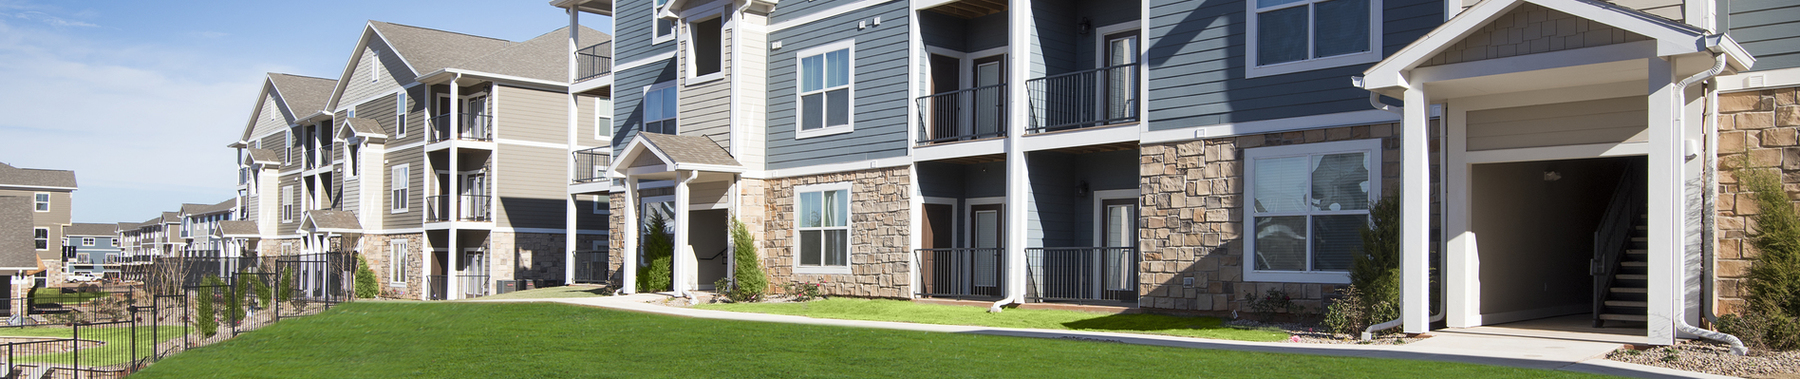

# About Dataset

<b> Context </b> 

The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

In [365]:
# Import required packages and modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [366]:
df = pd.read_csv('data.csv')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Data Understanding

We'll explore the provided dataset and understand its structure and features. 

In [367]:
# Display the first few rows of the dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [368]:
# Display the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [369]:
# Display summary statistics of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.00,551962.99,563834.70,0.00,322875.00,460943.46,654962.50,26590000.00
bedrooms,4600.00,3.40,0.91,0.00,3.00,3.00,4.00,9.00
bathrooms,4600.00,2.16,0.78,0.00,1.75,2.25,2.50,8.00
sqft_living,4600.00,2139.35,963.21,370.00,1460.00,1980.00,2620.00,13540.00
sqft_lot,4600.00,14852.52,35884.44,638.00,5000.75,7683.00,11001.25,1074218.00
floors,4600.00,1.51,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,4600.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
view,4600.00,0.24,0.78,0.00,0.00,0.00,0.00,4.00
condition,4600.00,3.45,0.68,1.00,3.00,3.00,4.00,5.00
sqft_above,4600.00,1827.27,862.17,370.00,1190.00,1590.00,2300.00,9410.00


In [370]:
# Check for missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [371]:
df.shape

(4600, 18)

# Data Visualization and Data Cleaning.


In [372]:
# Analysis and Visualization
fig = px.bar(
    x=df.bedrooms.value_counts().index,
    y=df.bedrooms.value_counts().values,
    labels={"x": "Number of Bedrooms", "y": "Number of Houses"},
    title="Number of Bedrooms with Number of Houses",
    color=df.bedrooms.value_counts().index
)

# Change the figure size
fig.update_layout(
    width=800,  # specify the width
    height=600,  # specify the height
)

# Show the figure
fig.show()

In [373]:
fig = px.bar(
    x=df.yr_built.value_counts().index,
    y=df.yr_built.value_counts().values,
    labels={"x": "Year Built", "y": "Number of Houses"},
    title="Year Built with Number of Houses",
    color=df.yr_built.value_counts().index,
)


# Change the figure size
fig.update_layout(
    width=800,  # specify the width
    height=600,  # specify the height
)

# Show the figure
fig.show()

In [374]:
fig = px.scatter(
    df,
    y="sqft_living", 
    x="price",
    title="Living Square Footage vs Price",
)

# Change the figure size
fig.update_layout(
    width=800,  # specify the width
    height=600,  # specify the height
)

# Show the figure
fig.show()

In [375]:
px.scatter(
    cleaned_df,
    y="sqft_above", 
    x="price",
    title="Square Lot vs Price",
)

Text(0.5, 1.0, 'Cities')

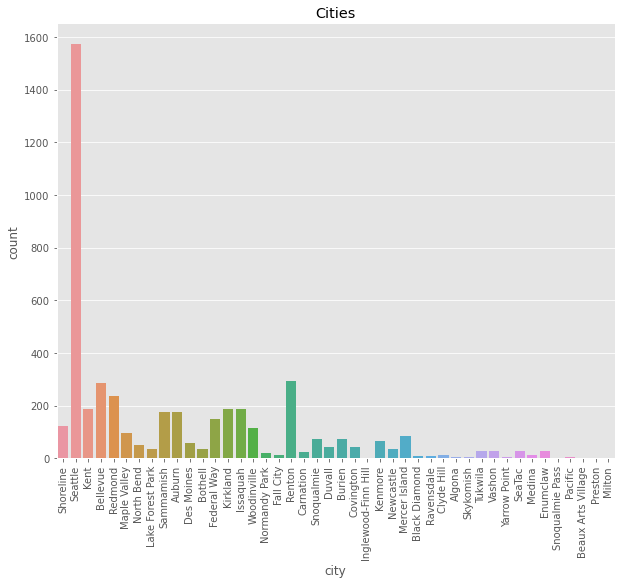

In [376]:
plt.figure(figsize=(10,8))
sns.countplot(x='city',data=df)
plt.xticks(rotation=90)
plt.title("Cities")

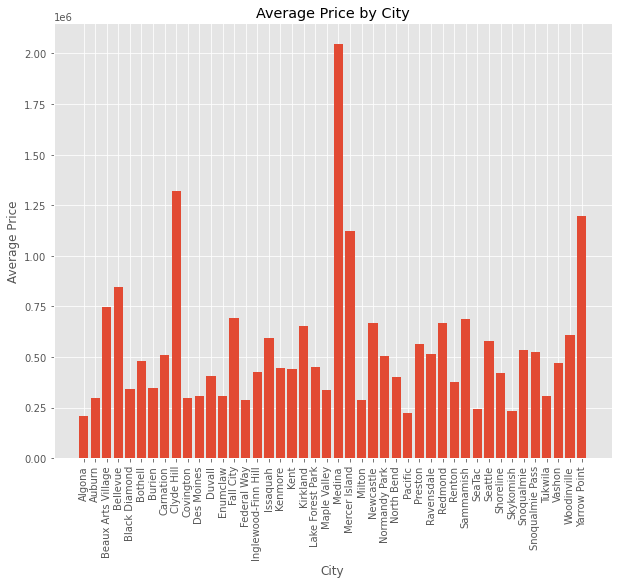

In [377]:
average_price_by_city = df.groupby('city')['price'].mean()
plt.figure(figsize=(10,8))
plt.bar(average_price_by_city.index, average_price_by_city.values)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price by City')
plt.xticks(rotation=90)
plt.show()

In [378]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'], dtype='object')

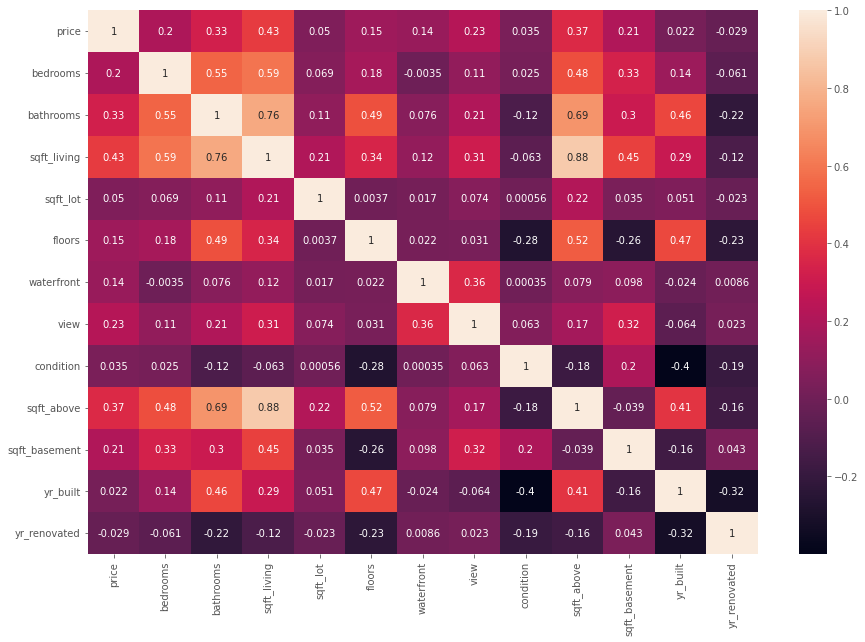

In [379]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True);

<Figure size 864x576 with 0 Axes>

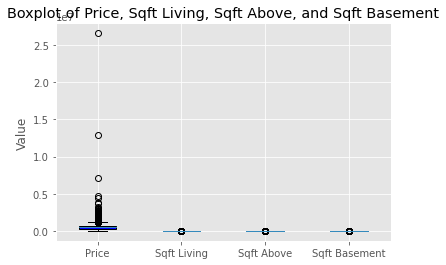

In [380]:
# Create a figure and axes
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()

# Plot boxplots for each column
boxplot = ax.boxplot([df['price'], df['sqft_living'], df['sqft_above'], df['sqft_basement']], patch_artist=True)

# Add labels and title
ax.set_xticklabels(['Price', 'Sqft Living', 'Sqft Above', 'Sqft Basement'])
ax.set_ylabel('Value')
ax.set_title('Boxplot of Price, Sqft Living, Sqft Above, and Sqft Basement')

# Add gridlines
ax.grid(True)

# Add colors to the boxplots
colors = ['blue', 'orange', 'green', 'red']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Show plot
plt.show()

By looking at the vizualisations we can say, 
1. Most of the people prefer 3BHK, followed by 4BHK, Bedroom is important Feature for predection Price.
2. Seattle city has highest number of houses
3. Price increase depends on bedrooms, bathrooms, sqft_living , sqft_above, sqft_basement,view, waterfront, floors, city.

# Feature Engineering

Let's create new features and transform existing ones to improve predictive power

In [381]:
current_year = 2024

# Create a new feature for the age of the house since renovation
df['age_since_renovation'] = current_year - df['yr_renovated']

# Replace 2024 values in 'age_since_renovation' with the age of the house
df.loc[df['yr_renovated'] == 0, 'age_since_renovation'] = current_year - df['yr_built']


In [382]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age_since_renovation
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,19
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,103
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,58
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,61
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.67,3.00,1.75,1510,6360,1.00,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,45
4596,2014-07-09 00:00:00,534333.33,3.00,2.50,1460,7573,2.00,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,15
4597,2014-07-09 00:00:00,416904.17,3.00,2.50,3010,7014,2.00,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,15
4598,2014-07-10 00:00:00,203400.00,4.00,2.00,2090,6630,1.00,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,50


In [383]:
clean_df = df.drop(columns=['date', 'country', 'statezip', 'street', 'yr_renovated', 'waterfront'])

In [384]:
clean_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,city,age_since_renovation
0,313000.00,3.00,1.50,1340,7912,1.50,0,3,1340,0,1955,Shoreline,19
1,2384000.00,5.00,2.50,3650,9050,2.00,4,5,3370,280,1921,Seattle,103
2,342000.00,3.00,2.00,1930,11947,1.00,0,4,1930,0,1966,Kent,58
3,420000.00,3.00,2.25,2000,8030,1.00,0,4,1000,1000,1963,Bellevue,61
4,550000.00,4.00,2.50,1940,10500,1.00,0,4,1140,800,1976,Redmond,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.67,3.00,1.75,1510,6360,1.00,0,4,1510,0,1954,Seattle,45
4596,534333.33,3.00,2.50,1460,7573,2.00,0,3,1460,0,1983,Bellevue,15
4597,416904.17,3.00,2.50,3010,7014,2.00,0,3,3010,0,2009,Renton,15
4598,203400.00,4.00,2.00,2090,6630,1.00,0,3,1070,1020,1974,Seattle,50


In [385]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        # Calculate Z-scores
        z_scores = stats.zscore(df_cleaned[column])
        # Set a threshold (3) beyond which data points are considered outliers
        threshold = 3
        # Remove outliers
        df_cleaned = df_cleaned[(z_scores < threshold) & (z_scores > -threshold)]
    return df_cleaned
columns_to_remove_outliers = ['sqft_basement','sqft_above','sqft_living','sqft_lot','price']

In [386]:
clean_df = remove_outliers(clean_df, columns_to_remove_outliers)
print(clean_df.shape)

(4384, 13)


In [387]:
# Perform one-hot encoding
clean_df = pd.get_dummies(clean_df, columns=['city'], drop_first=True)

In [388]:
clean_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,age_since_renovation,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.00,3.00,1.50,1340,7912,1.50,0,3,1340,0,1955,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,342000.00,3.00,2.00,1930,11947,1.00,0,4,1930,0,1966,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420000.00,3.00,2.25,2000,8030,1.00,0,4,1000,1000,1963,61,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,550000.00,4.00,2.50,1940,10500,1.00,0,4,1140,800,1976,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,490000.00,2.00,1.00,880,6380,1.00,0,3,880,0,1938,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.67,3.00,1.75,1510,6360,1.00,0,4,1510,0,1954,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4596,534333.33,3.00,2.50,1460,7573,2.00,0,3,1460,0,1983,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4597,416904.17,3.00,2.50,3010,7014,2.00,0,3,3010,0,2009,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4598,203400.00,4.00,2.00,2090,6630,1.00,0,3,1070,1020,1974,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [389]:
# Separate features (X) and target variable (y)
X = clean_df.drop(columns=['price'])
y = clean_df['price']

In [390]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'age_since_renovation', 'city_Auburn', 'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill', 'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill', 'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_Milton', 'city_Newcastle', 'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston', 'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish', 'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish', 'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tukwila', 'city_Vashon', 'city_Woodinville', 'city_Yarrow Point'], dtype='object')

In [391]:
y

0      313000.00
2      342000.00
3      420000.00
4      550000.00
5      490000.00
          ...   
4595   308166.67
4596   534333.33
4597   416904.17
4598   203400.00
4599   220600.00
Name: price, Length: 4384, dtype: float64

In [392]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
we'll choose an appropriate regression model and train it on the preprocessed dataset. Then, we'll evaluate the model's performance using suitable metrics like mean squared error (MSE) or root mean squared error (RMSE).

In [393]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [394]:
# 1. Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_test)
linear_reg_r2_train = linear_reg_model.score(X_train, y_train)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)

In [395]:
# 2. Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=400,random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_r2 = r2_score(y_test, random_forest_pred)
random_forest_r2_train = random_forest_model.score(X_train, y_train)
random_forest_rmse = mean_squared_error(y_test, random_forest_pred, squared=False)


In [396]:
# 3. Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=400, max_depth=5 ,min_samples_split=2, learning_rate= 0.1)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_pred)
gradient_boosting_r2_train = gradient_boosting_model.score(X_train, y_train)
gradient_boosting_rmse = mean_squared_error(y_test, gradient_boosting_pred, squared=False)


In [397]:
# Create a DataFrame to store the model evaluation metrics
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression'],
    'R2 score (Train)': [linear_reg_r2_train, random_forest_r2_train, gradient_boosting_r2_train],
    'R2 Score (Test)': [linear_reg_r2, random_forest_r2, gradient_boosting_r2],
    'Root Mean Squared Error (RMSE)': [linear_reg_rmse, random_forest_rmse, gradient_boosting_rmse]
})

# Display the model comparison table
model_comparison

,Model,R2 score (Train),R2 Score (Test),Root Mean Squared Error (RMSE)
0,Linear Regression,0.64,0.65,159851.60
1,Random Forest Regression,0.95,0.66,157433.51
2,Gradient Boosting Regression,0.94,0.64,161836.13
